In [10]:
import pandas as pd
import numpy as np

In [11]:
processed = 'processed'
submissions = 'submissions'
features = 'features'
df_train = pd.read_csv(f'{processed}/train.csv')
df_test =  pd.read_csv(f'{processed}/test.csv')

In [18]:
df_train = df_train.merge(pd.read_csv(f'{features}/pclass_dummy_train.csv'))
df_test =  df_test.merge(pd.read_csv(f'{features}/pclass_dummy_test.csv'))
df_train = df_train.merge(pd.read_csv(f'{features}/fare_quantiles_train.csv'))
df_test =  df_test.merge(pd.read_csv(f'{features}/fare_quantiles_test.csv'))

In [19]:
df_train.columns

Index(['PassengerId', 'Survived', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'src', 'Sex_female', 'Sex_male',
       'Fare_is_na', 'Fare_q_is(-0.001..7.568]', 'Fare_q_is(7.568..7.854]',
       'Fare_q_is(7.854..8.05]', 'Fare_q_is(8.05..10.5]',
       'Fare_q_is(10.5..14.454]', 'Fare_q_is(14.454..21.679]',
       'Fare_q_is(21.679..26.955]', 'Fare_q_is(26.955..41.579]',
       'Fare_q_is(41.579..78.051]', 'Fare_q_is(78.051..512.329]', 'Age_na',
       'Age_is(0..2]', 'Age_is(2..6]', 'Age_is(6..14]', 'Age_is(14..16]',
       'Age_is(16..18]', 'Age_is(18..25]', 'Age_is(25..35]', 'Age_is(35..40]',
       'Age_is(40..45]', 'Age_is(45..60]', 'Age_is(60..80]',
       'Age_q_is(0.169..14.0]', 'Age_q_is(14.0..19.0]', 'Age_q_is(19.0..22.0]',
       'Age_q_is(22.0..25.0]', 'Age_q_is(25.0..28.0]', 'Age_q_is(28.0..31.0]',
       'Age_q_is(31.0..36.0]', 'Age_q_is(36.0..42.0]', 'Age_q_is(42.0..50.0]',
       'Age_q_is(50.0..80.0]', 'Pclass_is_1', 'Pclass_is_

In [22]:
field_name = 'Survived'
feature_names = ['SibSp', 'Sex_male', 'Sex_female']\
    + [col for col in df_test.columns if 'Age_is' in col]\
    + [col for col in df_test.columns if 'Pclass_is' in col]\
    + [col for col in df_test.columns if 'Fare_q_is' in col]
feature_names

['SibSp',
 'Sex_male',
 'Sex_female',
 'Age_is(0..2]',
 'Age_is(2..6]',
 'Age_is(6..14]',
 'Age_is(14..16]',
 'Age_is(16..18]',
 'Age_is(18..25]',
 'Age_is(25..35]',
 'Age_is(35..40]',
 'Age_is(40..45]',
 'Age_is(45..60]',
 'Age_is(60..80]',
 'Pclass_is_1',
 'Pclass_is_2',
 'Pclass_is_3',
 'Fare_q_is(-0.001..7.568]',
 'Fare_q_is(7.568..7.854]',
 'Fare_q_is(7.854..8.05]',
 'Fare_q_is(8.05..10.5]',
 'Fare_q_is(10.5..14.454]',
 'Fare_q_is(14.454..21.679]',
 'Fare_q_is(21.679..26.955]',
 'Fare_q_is(26.955..41.579]',
 'Fare_q_is(41.579..78.051]',
 'Fare_q_is(78.051..512.329]']

In [23]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

cl = GradientBoostingClassifier()

kfold = KFold(random_state=42, n_splits=10)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(cl, df_train[feature_names], df_train[field_name], cv=kfold)
np.mean(accuracies)

0.8170911360799001

In [24]:
cl.fit(df_train[feature_names], df_train[field_name])
y_test = cl.predict(df_test[feature_names])
df_submit = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': y_test})
df_submit['Survived'] = df_submit['Survived'].astype(int)
df_submit.to_csv(f'{submissions}/submission016.csv', index=False)

In [26]:
# LB score: 0.76076
!head submissions/submission016.csv

head: submissions/submission016.csv: No such file or directory


In [27]:
!open submissions
!open https://www.kaggle.com/c/titanic/submit

In [28]:
df_features = pd.DataFrame({'name': feature_names, 'importance': cl.feature_importances_})
df_features.sort_values('importance', ascending=False, inplace=True)

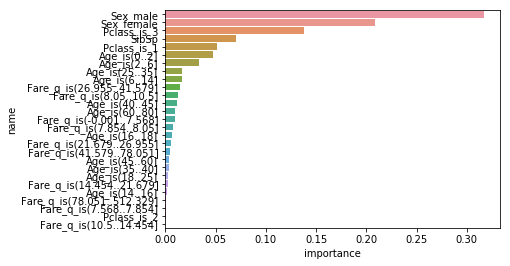

In [29]:
%matplotlib inline
import seaborn as sns
sns.barplot(x="importance", y="name", data=df_features)